# 用户价值预测
* 根据各个参数预测用户的价值

[kggle链接](https://www.kaggle.com/c/santander-value-prediction-challenge)

In [1]:
# 导入库
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing, model_selection, metrics
import lightgbm as lgb

In [2]:
DATAPATH="D:/dataset/SVPC/"
train_df = pd.read_csv(DATAPATH+"train.csv")
test_df = pd.read_csv(DATAPATH+"test.csv")
print("Train rows and columns : ", train_df.shape)
print("Test rows and columns : ", test_df.shape)

Train rows and columns :  (4459, 4993)
Test rows and columns :  (49342, 4992)


In [3]:
unique_df = train_df.nunique().reset_index()
unique_df.columns = ["col_name", "unique_count"]
constant_df = unique_df[unique_df["unique_count"]==1]
constant_df.shape

(256, 2)

In [4]:
### Get the X and y variables for building model ###
train_X = train_df.drop(constant_df.col_name.tolist() + ["ID", "target"], axis=1)
test_X = test_df.drop(constant_df.col_name.tolist() + ["ID"], axis=1)
train_y =train_df["target"].values

In [5]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

Using TensorFlow backend.


In [6]:
X = np.log1p(train_X.values)
Y = np.log1p(train_y)
T = np.log1p(test_X.values)

In [16]:
model = Sequential()
model.add(Dense(32, input_dim=X.shape[1], init='normal', activation='relu'))
model.add(Dense(256, init='normal', activation='softplus'))
model.add(Dropout(0.1))
model.add(Dense(1, init='normal',activation='relu'))
model.compile(loss='mse', optimizer='adam')

C:\anaconda\envs\kaggle180629\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(32, input_dim=4735, activation="relu", kernel_initializer="normal")`
  
C:\anaconda\envs\kaggle180629\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(256, activation="softplus", kernel_initializer="normal")`
  This is separate from the ipykernel package so we can avoid doing imports until
C:\anaconda\envs\kaggle180629\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, activation="relu", kernel_initializer="normal")`
  """


In [17]:
seed = 521
np.random.seed(seed)

In [21]:
model.summary()
h=model.fit(X,Y,batch_size=X.shape[1],epochs=128,validation_split=0.1,shuffle=True)
from sklearn.metrics import mean_squared_log_error
mean_squared_log_error(np.expm1(model.predict(X)).reshape(X.shape[0]),train_y)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 32)                151552    
_________________________________________________________________
dense_5 (Dense)              (None, 256)               8448      
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 257       
Total params: 160,257
Trainable params: 160,257
Non-trainable params: 0
_________________________________________________________________
Train on 4013 samples, validate on 446 samples
Epoch 1/128
4013/4013 [==============================] - 1s 293us/step - loss: 187.8263 - val_loss: 157.5494
Epoch 2/128
4013/4013 [==============================] - 1s 132us/step - loss: 161.8372 - val_loss: 130.5559
Epo

Epoch 69/128
4013/4013 [==============================] - 1s 141us/step - loss: 4.7200 - val_loss: 11.5278
Epoch 70/128
4013/4013 [==============================] - 1s 153us/step - loss: 4.6174 - val_loss: 11.4338
Epoch 71/128
4013/4013 [==============================] - 1s 128us/step - loss: 4.4772 - val_loss: 11.3307
Epoch 72/128
4013/4013 [==============================] - 1s 128us/step - loss: 4.3491 - val_loss: 11.2210
Epoch 73/128
4013/4013 [==============================] - 1s 127us/step - loss: 4.2411 - val_loss: 11.1115
Epoch 74/128
4013/4013 [==============================] - 1s 127us/step - loss: 4.0921 - val_loss: 11.0154
Epoch 75/128
4013/4013 [==============================] - 1s 127us/step - loss: 3.9918 - val_loss: 10.9312
Epoch 76/128
4013/4013 [==============================] - 1s 129us/step - loss: 3.8978 - val_loss: 10.8495
Epoch 77/128
4013/4013 [==============================] - 1s 130us/step - loss: 3.7712 - val_loss: 10.7669
Epoch 78/128
4013/4013 [=============

1.8375130590776207

In [15]:
p=pd.DataFrame({"ID":test_df["ID"],"target":np.expm1(model.predict(T).reshape(T.shape[0]))})
p.to_csv("nn2l.csv", index=False)

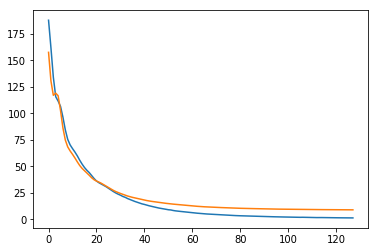

In [24]:
plt.plot(h.history["loss"])
plt.plot(h.history["val_loss"])
plt.show()

In [12]:
T

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [13]:
np.log1p(test_X.values[1:10])

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        , 17.01895271, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

In [22]:
h.history

{'val_loss': [157.54937744140625,
  130.55587768554688,
  116.99905395507812,
  119.06163024902344,
  116.57350158691406,
  102.66157531738281,
  86.26773071289062,
  74.8327865600586,
  68.36202239990234,
  64.55934143066406,
  61.362552642822266,
  57.92080307006836,
  54.24630355834961,
  50.821041107177734,
  48.05865478515625,
  45.90553283691406,
  43.849037170410156,
  41.521976470947266,
  39.18989562988281,
  37.357452392578125,
  36.11880874633789,
  35.15766143798828,
  34.040096282958984,
  32.70922088623047,
  31.372983932495117,
  30.038576126098633,
  28.679758071899414,
  27.38099479675293,
  26.245723724365234,
  25.28117561340332,
  24.417490005493164,
  23.582582473754883,
  22.76386833190918,
  21.99513053894043,
  21.322956085205078,
  20.75128746032715,
  20.231765747070312,
  19.707809448242188,
  19.183584213256836,
  18.682191848754883,
  18.187726974487305,
  17.725921630859375,
  17.319944381713867,
  16.96379280090332,
  16.640945434570312,
  16.328132629394